# I. Introduction 
- Name: Nurvita Aisah
- Batch: FTDS 007

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

**Attribute information**
- Invoice id: Computer generated sales slip invoice identification number
- Branch: Branch of supercenter (3 branches are available identified by A, B and C).
- City: Location of supercenters
- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
- Gender: Gender type of customer
- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
- Unit price: Price of each product in $
- Quantity: Number of products purchased by customer
- Tax: 5% tax fee for customer buying
- Total: Total price including tax
- Date: Date of purchase (Record available from January 2019 to March 2019)
- Time: Purchase time (10am to 9pm)
- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
- COGS: Cost of goods sold
- Gross margin percentage: Gross margin percentage
- Gross income: Gross income
- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

**Objective**

Comparing each branch based on their Gross income


# II. Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

# III. Data Loading

In [2]:
df_raw = pd.read_csv("supermarket_sales - Sheet1.csv") 
df_raw.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Checking dataset shape

In [3]:
df_raw.shape

(1000, 17)

Checking dataset info

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Checking the statisitics description

In [5]:
df_raw.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


Checking the missing data

In [6]:
df_raw.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

# IV. Data Cleaning

Copying dataset

In [7]:
df = df_raw.copy()
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Changing date-data type 

In [8]:
df['Date'] = pd.to_datetime(df['Date']) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

# V. Data Exploration

Query for product line

In [9]:
products = df['Product line'].value_counts() 
products

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

Product Line Percentation

<AxesSubplot:title={'center':'Product Line Percentation'}, ylabel='Product line'>

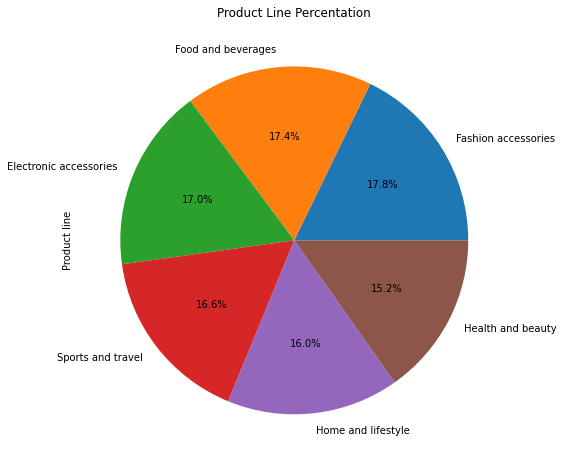

In [72]:
products.plot(kind='pie', figsize=[16, 8], autopct='%1.1f%%', title="Product Line Percentation")

Query for cities

In [11]:
cities = df['City'].value_counts()
cities

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

Cities Percentation

<AxesSubplot:title={'center':'City Percentation'}, ylabel='City'>

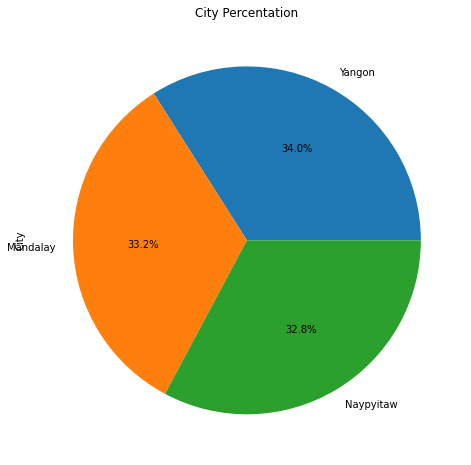

In [75]:
cities.plot(kind='pie', figsize=[16, 8], autopct='%1.1f%%', title="City Percentation")

Query for branch

In [13]:
branchs = df['Branch'].value_counts() 
branchs

A    340
B    332
C    328
Name: Branch, dtype: int64

Branch Percentation

<AxesSubplot:title={'center':'Branch Percentation'}, ylabel='Branch'>

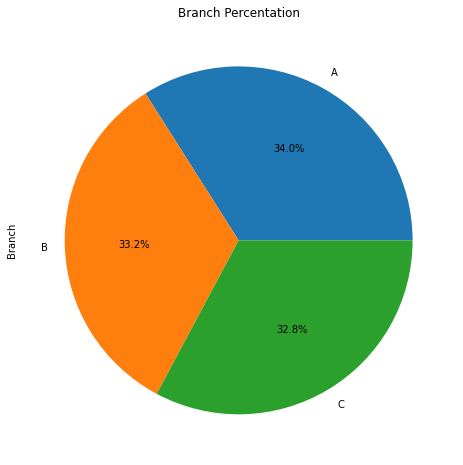

In [77]:
branchs.plot(kind='pie', figsize=[16, 8], autopct='%1.1f%%', title="Branch Percentation")

Query for Customer type 

In [15]:
customers = df['Customer type'].value_counts()
customers

Member    501
Normal    499
Name: Customer type, dtype: int64

Customer Type Percentation

<AxesSubplot:title={'center':'Customer Type Percentation'}, ylabel='Customer type'>

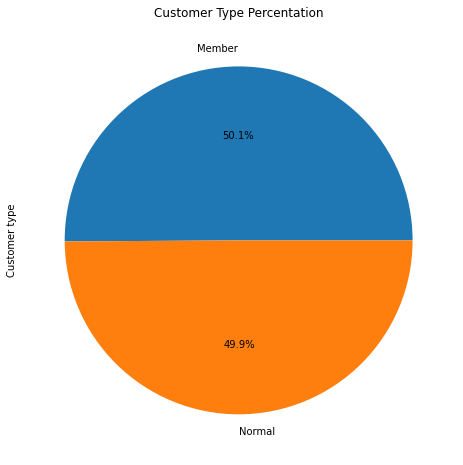

In [78]:
customers.plot(kind='pie', figsize=[16, 8], autopct='%1.1f%%', title="Customer Type Percentation")

Query for genders

In [17]:
genders = df['Gender'].value_counts() 
genders

Female    501
Male      499
Name: Gender, dtype: int64

Gender Percentation

<AxesSubplot:title={'center':'Gender Percentation'}, ylabel='Gender'>

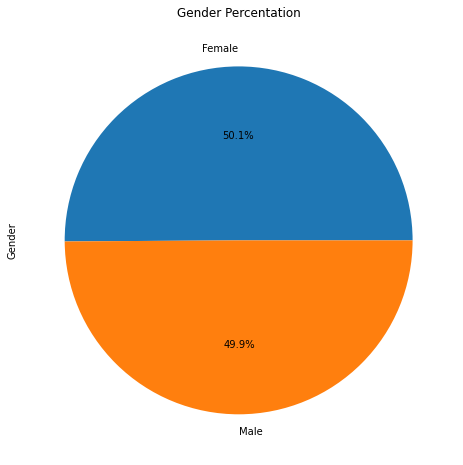

In [79]:
genders.plot(kind='pie', figsize=[16, 8], autopct='%1.1f%%', title="Gender Percentation")

Query for payment

In [19]:
payment = df['Payment'].value_counts()
payment

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

Payment methods percentation

<AxesSubplot:title={'center':'Payment Methods Percentation'}, ylabel='Payment'>

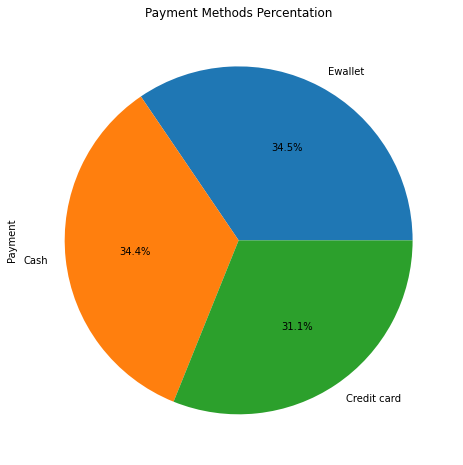

In [80]:
payment.plot(kind='pie', figsize=[16, 8], autopct='%1.1f%%', title="Payment Methods Percentation")

Query for branches rating

In [21]:
A_rating = df[df['Branch']=='A'].groupby('Rating').count()
B_rating = df[df['Branch']=='B'].groupby('Rating').count()
C_rating = df[df['Branch']=='C'].groupby('Rating').count()

A_rating

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income
Rating,,,,,,,,,,,,,,,,
4.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4.1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
4.2,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
4.3,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
4.4,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
9.7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
9.8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


Branch B rating

In [22]:
B_rating

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income
Rating,,,,,,,,,,,,,,,,
4.0,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
4.1,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
4.2,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
4.3,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
4.4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
9.7,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
9.8,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


Branch  C rating

In [23]:
C_rating

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income
Rating,,,,,,,,,,,,,,,,
4.0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
4.1,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
4.2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
4.3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
4.4,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
9.7,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
9.8,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


Daily gross income in every branch

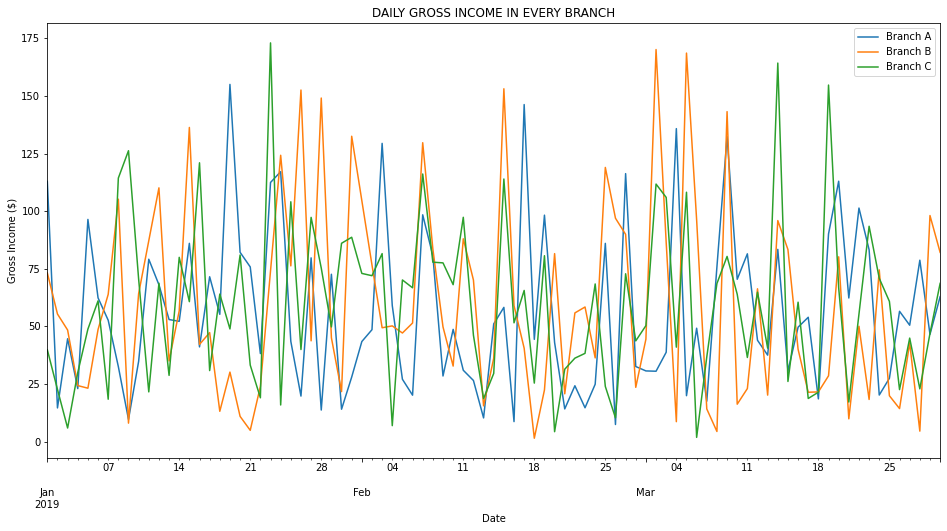

In [90]:
daily_gross_income_a = df[df['Branch']=='A'].groupby('Date').sum()['gross income']
daily_gross_income_b = df[df['Branch']=='B'].groupby('Date').sum()['gross income']
daily_gross_income_c = df[df['Branch']=='C'].groupby('Date').sum()['gross income'] 

daily_gross_income_a.plot(figsize=(16,8), label= 'Branch A') 
daily_gross_income_b.plot(figsize=(16,8), label= 'Branch B')
daily_gross_income_c.plot(figsize=(16,8), label= 'Branch C')



plt.legend()
plt.ylabel("Gross Income ($)")
plt.title("DAILY GROSS INCOME IN EVERY BRANCH")
plt.show()

Branch, gross income and gender visualisation

Bar chart

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


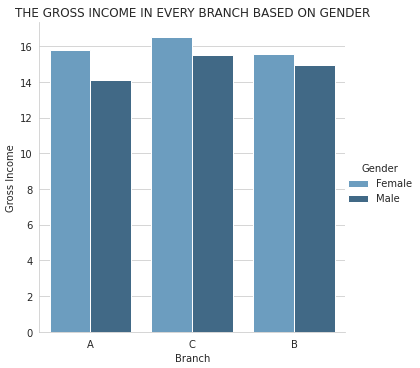

In [91]:
with sns.axes_style(style='whitegrid'):
    a = sns.factorplot("Branch", "gross income", "Gender", data=df, kind="bar", ci=None, palette="Blues_d")
    a.set_axis_labels("Branch", "Gross Income");
plt.title("THE GROSS INCOME IN EVERY BRANCH BASED ON GENDER")
plt.show()

Box plot

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


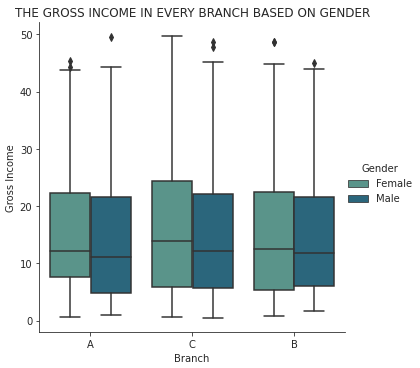

In [92]:
with sns.axes_style(style='ticks'):
    a = sns.factorplot("Branch", "gross income", "Gender", data=df, kind="box", palette="crest")
    a.set_axis_labels("Branch", "Gross Income");
plt.title("THE GROSS INCOME IN EVERY BRANCH BASED ON GENDER")
plt.show()

Branch, gross income and customer type visualisation

Bar chart

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


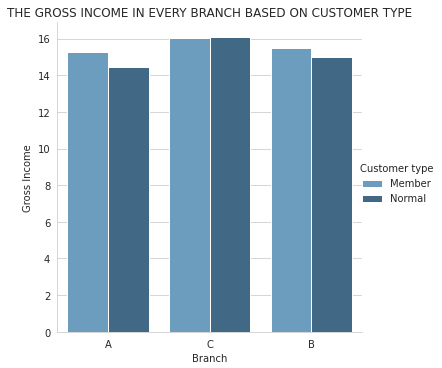

In [94]:
with sns.axes_style(style='whitegrid'):
    b = sns.factorplot("Branch", "gross income", "Customer type", data=df, kind="bar", ci=None, palette="Blues_d")
    b.set_axis_labels("Branch", "Gross Income");
plt.title("THE GROSS INCOME IN EVERY BRANCH BASED ON CUSTOMER TYPE")
plt.show()

Box plot

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


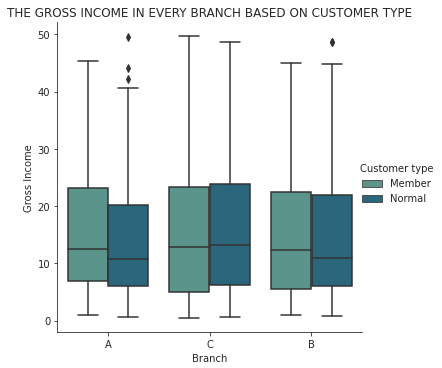

In [93]:
with sns.axes_style(style='ticks'):
    b = sns.factorplot("Branch", "gross income", "Customer type", data=df, kind="box", palette="crest")
    b.set_axis_labels("Branch", "Gross Income");
plt.title("THE GROSS INCOME IN EVERY BRANCH BASED ON CUSTOMER TYPE")
plt.show()

Branch, gross income and product line visualisation

Bar chart

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


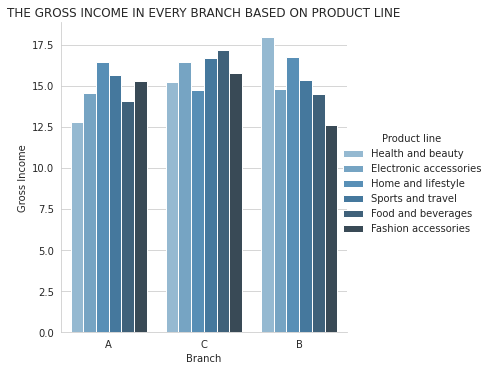

In [95]:
with sns.axes_style(style='whitegrid'):
    c = sns.factorplot("Branch", "gross income", "Product line", data=df, kind="bar", ci=None, palette="Blues_d")
    c.set_axis_labels("Branch", "Gross Income");
plt.title("THE GROSS INCOME IN EVERY BRANCH BASED ON PRODUCT LINE")
plt.show()

Box plot

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


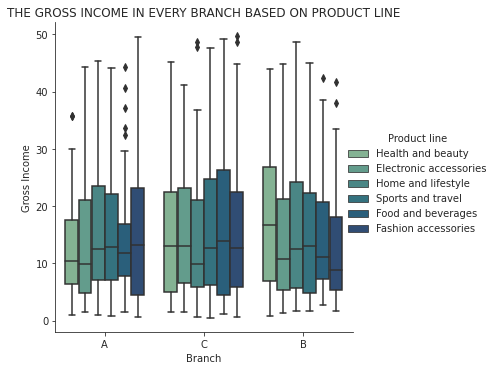

In [96]:
with sns.axes_style(style='ticks'):
    c = sns.factorplot("Branch", "gross income", "Product line", data=df, kind="box", palette="crest")
    c.set_axis_labels("Branch", "Gross Income");
plt.title("THE GROSS INCOME IN EVERY BRANCH BASED ON PRODUCT LINE")
plt.show()

Branch, gross income and payment visualisation

Bar chart

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


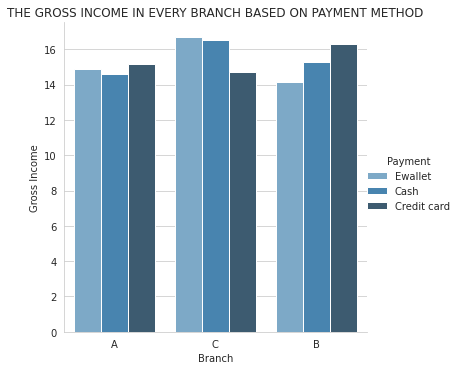

In [97]:
with sns.axes_style(style='whitegrid'):
    d = sns.factorplot("Branch", "gross income", "Payment", data=df, kind="bar", ci=None, palette="Blues_d")
    d.set_axis_labels("Branch", "Gross Income");
plt.title("THE GROSS INCOME IN EVERY BRANCH BASED ON PAYMENT METHOD")
plt.show()

Box plot

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


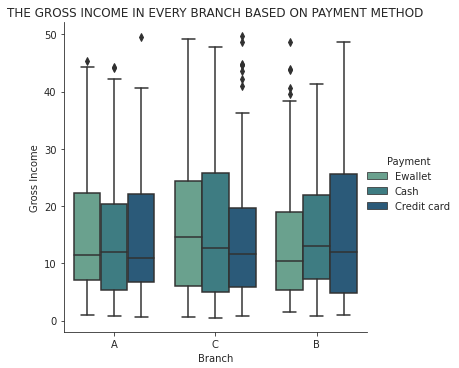

In [98]:
with sns.axes_style(style='ticks'):
    d = sns.factorplot("Branch", "gross income", "Payment", data=df, kind="box", palette="crest")
    d.set_axis_labels("Branch", "Gross Income");
plt.title("THE GROSS INCOME IN EVERY BRANCH BASED ON PAYMENT METHOD")
plt.show()

# VI. Measure of Central Tendency

Query gross income for every branch

In [ ]:
branch_a = df.query("Branch == 'A'")
branch_b = df.query("Branch == 'B'")
branch_c = df.query("Branch == 'C'")

In [ ]:
A_gross_income = branch_a["gross income"]
B_gross_income = branch_b["gross income"]
C_gross_income = branch_c["gross income"]

VI.1. Average of gross income in every branch

In [ ]:
print("The average of Branch A gross income : ", A_gross_income.mean())
print("The average of Branch B gross income : ", B_gross_income.mean())
print("The average of Branch C gross income : ", C_gross_income.mean())

The average of Branch A gross income :  14.874001470588235
The average of Branch B gross income :  15.232024096385542
The average of Branch C gross income :  16.05236737804878


VI.2. Median of gross income in every branch

In [ ]:
print("The median of Branch A gross income : ", A_gross_income.median())
print("The median of Branch B gross income : ", B_gross_income.median())
print("The median of Branch C gross income : ", C_gross_income.median())

The median of Branch A gross income :  11.468
The median of Branch B gross income :  12.042
The median of Branch C gross income :  12.92475


VI.3. Mode of gross income in every branch

In [ ]:
print("The mode of Branch A gross income : ", A_gross_income.mode())
print("The mode of Branch B gross income : ", B_gross_income.mode())
print("The mode of Branch C gross income : ", C_gross_income.mode())

The mode of Branch A gross income :  0    10.326
dtype: float64
The mode of Branch B gross income :  0    12.57
dtype: float64
The mode of Branch C gross income :  0    39.48
dtype: float64


# VII. Measure of Variance

VII.1. Variance of gross income in every branch

In [ ]:
print("The variance of Branch A gross income : ", A_gross_income.var())
print("The variance of Branch B gross income : ", B_gross_income.var())
print("The variance of Branch C gross income : ", C_gross_income.var())

The variance of Branch A gross income :  121.67143076179725
The variance of Branch B gross income :  133.2898453544025
The variance of Branch C gross income :  157.0377402614096


VII.2. Standard deviation of gross income in every branch

In [ ]:
print("The standard deviation of Branch A gross income : ", A_gross_income.std())
print("The standard deviation of Branch B gross income : ", B_gross_income.std())
print("The standard deviation of Branch C gross income : ", C_gross_income.std())

The standard deviation of Branch A gross income :  11.030477358745507
The standard deviation of Branch B gross income :  11.54512214549515
The standard deviation of Branch C gross income :  12.531469996030378


VII.3. Range of gross income in every branch

In [ ]:
print("The range of Branch A gross income : ", (A_gross_income.max()-A_gross_income.min()))
print("The range of Branch B gross income : ", (B_gross_income.max()-B_gross_income.min()))
print("The range of Branch C gross income : ", (C_gross_income.max()-C_gross_income.min()))

The range of Branch A gross income :  48.8855
The range of Branch B gross income :  47.802499999999995
The range of Branch C gross income :  49.1415


VII.4. Confidence Interval

Confidence interval of Branch A gross income

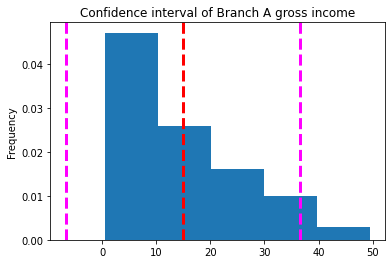

Sampling Mean: 14.874001470588235
Sampling Standard Error: 11.030477358745507
Confidence Interval of 95%: (-6.745336884837462, 36.49333982601393)


In [ ]:
m = A_gross_income.mean()
sd = A_gross_income.std()
ci = stats.norm.interval(0.95, m, sd)

# Plot the distribution, mean, and CI
A_gross_income.plot.hist(title='Confidence interval of Branch A gross income', bins=5, density=True) 
plt.axvline(m, color='red', linestyle='dashed', linewidth=3)
plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=3)
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=3)
plt.show()

# Print the Mean, StdDev and 95% CI
print ('Sampling Mean: ' + str(m))
print ('Sampling Standard Error: ' + str(sd))
print ('Confidence Interval of 95%: ' + str(ci))


Confidence interval of Branch B gross income

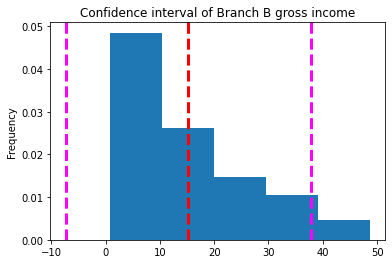

Sampling Mean: 15.232024096385542
Sampling Standard Error: 11.54512214549515
Confidence Interval of 95%: (-7.395999505900749, 37.860047698671835)


In [ ]:
m = B_gross_income.mean()
sd = B_gross_income.std()
ci = stats.norm.interval(0.95, m, sd)

# Plot the distribution, mean, and CI
B_gross_income.plot.hist(title='Confidence interval of Branch B gross income', bins=5, density=True) 
plt.axvline(m, color='red', linestyle='dashed', linewidth=3)
plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=3)
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=3)
plt.show()

# Print the Mean, StdDev and 95% CI
print ('Sampling Mean: ' + str(m))
print ('Sampling Standard Error: ' + str(sd))
print ('Confidence Interval of 95%: ' + str(ci))


Confidence interval of Branch C gross income

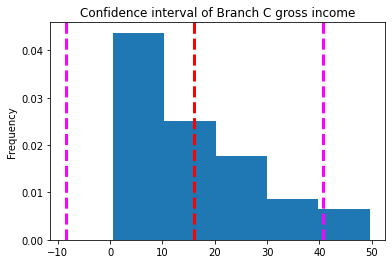

Sampling Mean: 16.05236737804878
Sampling Standard Error: 12.531469996030378
Confidence Interval of 95%: (-8.508862487515056, 40.61359724361262)


In [ ]:
m = C_gross_income.mean()
sd = C_gross_income.std()
ci = stats.norm.interval(0.95, m, sd)

# Plot the distribution, mean, and CI
C_gross_income.plot.hist(title='Confidence interval of Branch C gross income', bins=5, density=True) 
plt.axvline(m, color='red', linestyle='dashed', linewidth=3)
plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=3)
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=3)
plt.show()

# Print the Mean, StdDev and 95% CI
print ('Sampling Mean: ' + str(m))
print ('Sampling Standard Error: ' + str(sd))
print ('Confidence Interval of 95%: ' + str(ci))


# VIII. Hypothesis Testing
In the hypothesis testing, we compare whether the average gross income of Branch A, Branch B, and Branch C are significantly different or not. We test the null hypothesis with the assumption that the significant level is 5% and the methodology we use is ANOVA. ANOVA methodology is used for comparing more than two variables. The hypothesis we use in this case as follows:

H0: μ the gross income of Branch A = μ the gross income of Branch B = μ the gross income of Branch C

H0: μ the gross income of Branch A != μ the gross income of Branch B != μ the gross income of Branch C

In [ ]:
print("The average of Branch A gross income : ", A_gross_income.mean())
print("The average of Branch B gross income : ", B_gross_income.mean())
print("The average of Branch C gross income : ", C_gross_income.mean())

The average of Branch A gross income :  14.874001470588235
The average of Branch B gross income :  15.232024096385542
The average of Branch C gross income :  16.05236737804878


P-value and F-statistics calculation

In [ ]:
f_stat,p_value = stats.f_oneway(A_gross_income, B_gross_income, C_gross_income)
print('P-value:',p_value)
print('F-statistics',f_stat)

P-value: 0.413210174367147
F-statistics 0.8845828327760509


# IX. Conclusion

1. The average of every branch gross income as follows:
- Branch A: 14.87
- Branch B: 15.23
- Branch C: 16.05
2. The P-value and F-statistics we are obtained:
- P-value: 0.41
- F-statistics: 0.88

Since the p-value obtained (0.41) is greater than the significance level (0.05), thus we accept the null hypothesis. It could be implied that the average gross income of Branch A, Branch B, and Branch C are insignificant.